#### Učitavanje potrebnih biblioteka 

In [18]:
from scipy.fft import fft
import IPython
from scipy.io import wavfile
import ipywidgets as widgets
from IPython.display import Markdown, Image
from testbench import Testbench

In [19]:
# Pomocna funkcija za plotovanje

def stemSequence(x, y, plotName = 'MyPlot', stemColor = 'tab:blue', xlims = [], ylims = [], xlabel = '', ylabel = '', showLegend = True):
    markerline, stemlines, baseline = plt.stem(x, y, stemColor, label = plotName)
    plt.setp(markerline, 'markerfacecolor', stemColor, 'markeredgecolor', stemColor)
    if xlabel != '':
        plt.xlabel(xlabel)
    if ylabel != '':
        plt.ylabel(ylabel)
    if xlims != []:
        plt.xlim(xlims)
    if ylims != []:
        plt.ylim(ylims)
    if showLegend:
        plt.legend(loc = 'upper right')

## Vežbe za samostalni rad

#### Kreiranje padajućeg menija

In [20]:
USE_WIDGETS = False

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = False)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    
    return np, mpl, plt

### Zadatak: 
Napraviti funkcije koje za uneti signal u vremenskom domenu $x(t)$ vraćaju redom amplitudske i fazne karakteristike ovog signala u frekvencijskom domenu. Nakon toga, pozvati već implementiranu funkciju za prikaz ovih karakteristika ()

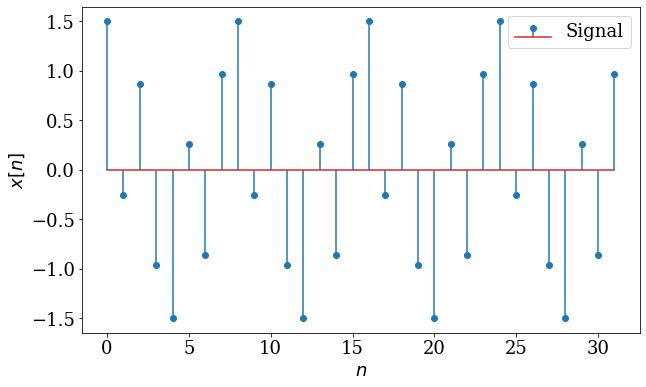

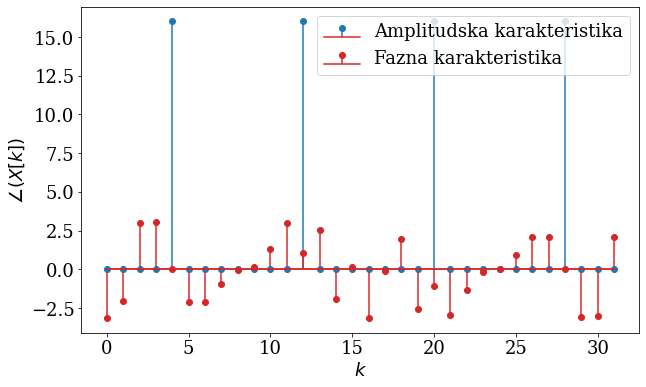

In [21]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
plt.rcParams["figure.figsize"] = (10,6)

def returnAmpCharacteristic(x: np.array) -> np.array:
    # ovde dopunite funkciju za racunanje amplitudske karakteristike

    return None

def returnPhaseCharacteristic(x: np.array) -> np.array:
    # ovde dopunite funkciju za racunanje fazne karakteristike

    return None

N = 32

# relativne ucestanosti
F1 = 1/8  
F2 = 3/8
#pocetne faze
Phi1 = 0 # np.pi/3, 2*np.pi/3 
Phi2 = np.pi/3

n = np.arange(N)
k = np.arange(N)

x = np.cos(2*np.pi*F1*n + Phi1) + np.cos(2*np.pi*F2*n + Phi2)

# racunanje amplitudske karakteristike
X_amp = returnAmpCharacteristic(x)

# racunanje fazne karakteristike
X_phase = returnPhaseCharacteristic(x)
# Prikaz originalnog signala
plt.figure()

# dopuniti parametre funkcije za prikaz originalnog signala
stemSequence(n, x, plotName = 'Signal', xlabel = r'$n$', ylabel = r'$x[n]$')


#Prikaz amplitudskih i faznih karakteristika
plt.figure()

#dopuniti paremetre funkcija za prikaz amplitudskih i faznih karakteristika signala

stemSequence( '''dopuni''', '''dopuni''', plotName = 'Amplitudska karakteristika', xlabel = r'$k$', ylabel = r'$|X[k]|$')
stemSequence('''dopuni''', '''dopuni''', plotName = 'Fazna karakteristika', stemColor = 'tab:red', xlabel = r'$k$', ylabel = r'$\angle(X[k])$')

### Primena ovog prikaza na realnim podacima

In [22]:

def loadSignalAndPlotSpectra(filename):
    fs, x = wavfile.read("datasets/sounds/"+filename)
    IPython.display.display(IPython.display.Audio(x, rate = fs))

    N = len(x)
    X = returnAmpCharacteristic(x)
    
    if "guitar" in filename:
        fMaxShow = 2000
    else:
        fMaxShow = 6000
    
    Nmax = fMaxShow*N//fs
    f = fs*np.arange(Nmax)/N

    # only part of the spectra
    X = X[:len(f)]
    
    # Plot spectra
    fig = plt.figure(figsize = [6, 4])
    plt.plot(f, abs(X))
    plt.subplots_adjust(bottom=0.15, left=0.15)
    plt.xlabel(r'$f$ [Hz]')
    plt.ylabel(r'$|X[k]|$')
    
    # Plot signal
    fig = plt.figure(figsize = [6, 4])
    n = np.arange(N//10, N//10 + 2000)
    t = n/fs
    plt.plot(t, x[n])
    plt.subplots_adjust(bottom=0.15, left=0.15)
    plt.xlabel(r'$t$ [s]')
    plt.ylabel(r'$x(t)$')
     
widgets.interact(loadSignalAndPlotSpectra, filename=["01_guitar_E2.wav",  
                                                     "02_guitar_A2.wav", 
                                                     "03_guitar_D3.wav", 
                                                     "04_guitar_G3.wav",
                                                     "05_guitar_H3.wav",
                                                     "06_guitar_E4.wav",
                                                     "07_clarinet_A.wav",
                                                     "08_violin_H.wav"])

interactive(children=(Dropdown(description='filename', options=('01_guitar_E2.wav', '02_guitar_A2.wav', '03_gu…

<function __main__.loadSignalAndPlotSpectra(filename)>

In [23]:
fs, x = wavfile.read('datasets/sounds/chopin.wav')
x = x.astype('float64') 

display(Markdown(f"Nokturno na učestanosti odabiranja %.1f Hz" % (fs)))
IPython.display.display(IPython.display.Audio(x, rate = fs))

display(Markdown("Faktor smanjenja $f_S$:"))

def downsample(D):
    y = x[::D]
    fsnew = float(fs)/D
    display(Markdown(f"Nokturno na učestanosti odabiranja %.1f Hz" % (fsnew))) 
    IPython.display.display(IPython.display.Audio(y, rate = fsnew))
    
widgets.interact(downsample, 
                 D = (3, 12, 3))

Nokturno na učestanosti odabiranja 44100.0 Hz

Faktor smanjenja $f_S$:

interactive(children=(IntSlider(value=6, description='D', max=12, min=3, step=3), Output()), _dom_classes=('wi…

<function __main__.downsample(D)>